<a href="https://colab.research.google.com/github/nyabutolewis33/-legendary-computing-machine/blob/main/predicting_equipment_failure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
from google.colab import files

# Upload a file and store it in a variable
uploaded = files.upload()

# Get the file name
file_name = list(uploaded.keys())[0]

# Print the file name
print("Uploaded file:", file_name)


Saving Sensor data.csv to Sensor data.csv
Uploaded file: Sensor data.csv


In [31]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('/content/Sensor data.csv')

# Display the first few rows of the DataFrame
print(df.head())


   UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1551         42.8                0                0    0   
1                    1408         46.3                3                0    0   
2                    1498         49.4                5                0    0   
3                    1433         39.5                7                0    0   
4                    1408         40.0                9                0    0   

   HDF  PWF  OSF  RNF  
0    0    0    0    0  
1    0    0    0    0  
2    0  

   UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1551         42.8                0                0    0   
1                    1408         46.3                3                0    0   
2                    1498         49.4                5                0    0   
3                    1433         39.5                7                0    0   
4                    1408         40.0                9                0    0   

   HDF  PWF  OSF  RNF  
0    0    0    0    0  
1    0    0    0    0  
2    0  

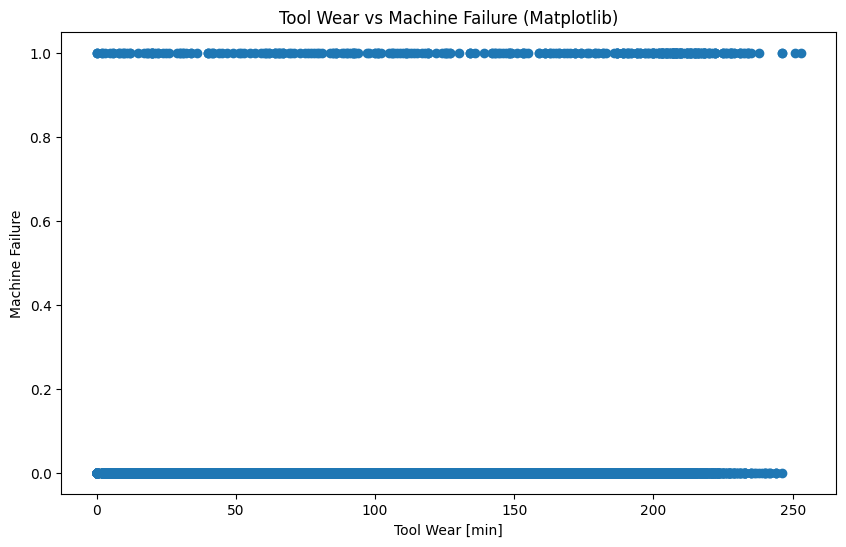

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('/content/Sensor data.csv')

# Display the first few rows of the DataFrame
print(df.head())

# Scatter plot using Matplotlib
plt.figure(figsize=(10, 6))
plt.scatter(df['Tool wear [min]'], df['Machine failure'])
plt.title('Tool Wear vs Machine Failure (Matplotlib)')
plt.xlabel('Tool Wear [min]')
plt.ylabel('Machine Failure')
plt.show()




   UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1551         42.8                0                0    0   
1                    1408         46.3                3                0    0   
2                    1498         49.4                5                0    0   
3                    1433         39.5                7                0    0   
4                    1408         40.0                9                0    0   

   HDF  PWF  OSF  RNF  
0    0    0    0    0  
1    0    0    0    0  
2    0  

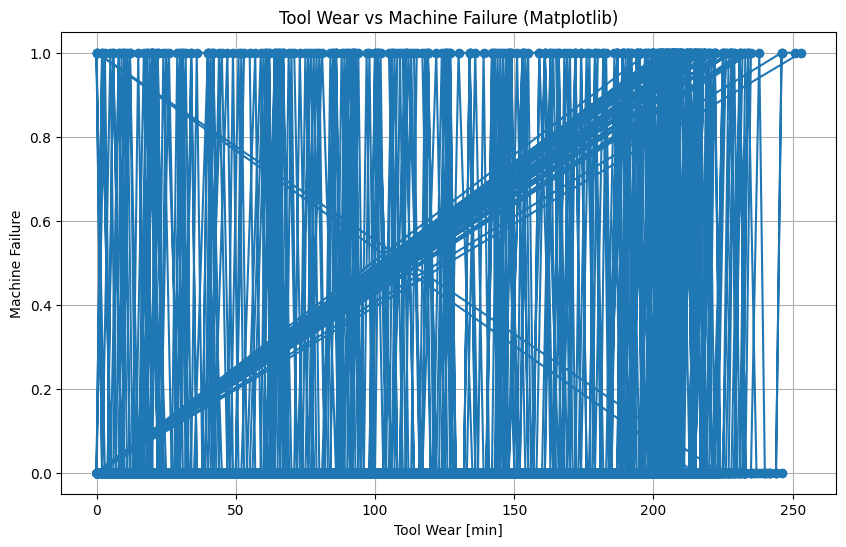

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('/content/Sensor data.csv')

# Display the first few rows of the DataFrame
print(df.head())

# Line plot using Matplotlib
plt.figure(figsize=(10, 6))
plt.plot(df['Tool wear [min]'], df['Machine failure'], marker='o', linestyle='-')
plt.title('Tool Wear vs Machine Failure (Matplotlib)')
plt.xlabel('Tool Wear [min]')
plt.ylabel('Machine Failure')
plt.grid(True)
plt.show()




In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib

# Read the CSV file into a DataFrame
df = pd.read_csv('/content/Sensor data.csv')

# Assuming 'Tool wear [min]' as the feature and 'Machine failure' as the target variable
X = df[['Tool wear [min]']]
y = df['Machine failure']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a RandomForestClassifier (you can choose a different model based on your requirements)
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

# Save the trained model for future use
joblib.dump(model, 'equipment_failure_model.joblib')


Accuracy: 0.97

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1939
           1       0.00      0.00      0.00        61

    accuracy                           0.97      2000
   macro avg       0.48      0.50      0.49      2000
weighted avg       0.94      0.97      0.95      2000



['equipment_failure_model.joblib']

In [30]:
# Load the saved model
loaded_model = joblib.load('equipment_failure_model.joblib')

# Example: Predict machine failure for a new data point
new_data_point = [[6]]
prediction = loaded_model.predict(new_data_point)
print(f'Predicted Machine Failure: {prediction[0]}')


Predicted Machine Failure: 0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
